## Tugas 1
* Preprocessing 
* Feature Engineering

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Untuk mempermudah, simpan setiap objek agar dapat digunakan untuk pemodelan maupun deployment. Gunakan library Pickle
import pickle

%matplotlib inline

In [2]:
!pip -q install sastrawi
%pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [3]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# Data Acuisition


In [4]:
df = pd.read_csv('file/20191002-reviews.csv')
df.head()

,itemId,category,name,rating,originalRating,reviewTitle,reviewContent,likeCount,upVotes,downVotes,helpful,relevanceScore,boughtDate,clientType,retrievedDate
0,100002528,beli-harddisk-eksternal,Kamal U.,5,NaN,NaN,bagus mantap dah sesui pesanan,0,0,0,True,26.51,09 Apr 2019,androidApp,2019-10-02
1,100002528,beli-harddisk-eksternal,yofanca m.,4,NaN,NaN,"Bagus, sesuai foto",0,0,0,True,22.49,24 Sep 2017,androidApp,2019-10-02
2,100002528,beli-harddisk-eksternal,Lazada Customer,5,NaN,ok mantaaapppp barang sesuai pesanan.. good,okkkkk mantaaaaaaapppp ... goood,0,0,0,True,21.50,04 Apr 2018,androidApp,2019-10-02
3,100002528,beli-harddisk-eksternal,Lazada Customer,4,NaN,NaN,bagus sesuai,0,0,0,True,20.51,22 Sep 2017,androidApp,2019-10-02
4,100002528,beli-harddisk-eksternal,Yosep M.,5,NaN,NaN,NaN,0,0,0,True,16.01,17 Agu 2018,androidApp,2019-10-02


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203787 entries, 0 to 203786
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   itemId          203787 non-null  int64  
 1   category        203787 non-null  object 
 2   name            203787 non-null  object 
 3   rating          203787 non-null  int64  
 4   originalRating  8 non-null       float64
 5   reviewTitle     23404 non-null   object 
 6   reviewContent   107029 non-null  object 
 7   likeCount       203787 non-null  int64  
 8   upVotes         203787 non-null  int64  
 9   downVotes       203787 non-null  int64  
 10  helpful         203787 non-null  bool   
 11  relevanceScore  203787 non-null  float64
 12  boughtDate      196680 non-null  object 
 13  clientType      203787 non-null  object 
 14  retrievedDate   203787 non-null  object 
dtypes: bool(1), float64(2), int64(5), object(7)
memory usage: 22.0+ MB


In [6]:
data = df[['reviewTitle','reviewContent','rating']]
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21078 entries, 2 to 203786
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   reviewTitle    21078 non-null  object
 1   reviewContent  21078 non-null  object
 2   rating         21078 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 658.7+ KB


In [7]:
print('Total Jumlah Review:', data.shape[0], 'data\n')
print('terdiri dari (Rating):')
print('-- [1] Bintang 1\t:', data[data.rating == 1].shape[0], 'data')
print('-- [2] Bintang 2\t:', data[data.rating == 2].shape[0], 'data')
print('-- [3] Bintang 3\t:', data[data.rating == 3].shape[0], 'data')
print('-- [4] Bintang 4\t:', data[data.rating == 4].shape[0], 'data')
print('-- [5] Bintang 5\t:', data[data.rating == 5].shape[0], 'data\n')

Total Jumlah Review: 21078 data

terdiri dari (Rating):
-- [1] Bintang 1	: 2705 data
-- [2] Bintang 2	: 865 data
-- [3] Bintang 3	: 1620 data
-- [4] Bintang 4	: 3709 data
-- [5] Bintang 5	: 12179 data



In [8]:
data.head()

,reviewTitle,reviewContent,rating
2,ok mantaaapppp barang sesuai pesanan.. good,okkkkk mantaaaaaaapppp ... goood,5
7,ada pengirimn ntb bima,bima,1
9,Barang bagus sesuai specs,"Pesan rabu sore,minggu sore sampe,,barang sesu...",5
11,Ini cicil pake apa?,"Mau tanya ini cicilnya pake apa ya,cc bkn?",1
12,Beli cash sesuai Harga di atas,Apakah TV. Tsb. Suda ada anti gores..,5


Menambahkan label kelompok :
* [0] rating 1, 2, 3 = 'jelek'
* [1] rating 4 & 5 = 'bagus'

In [9]:
data['label'] = 0
data['label'].loc[data.rating == 4] = 1
data['label'].loc[data.rating == 5] = 1


C:\Users\hp\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [10]:
print('Total Jumlah Review:', data.shape[0], 'data\n')
print('terdiri dari (label):')
print('-- [0] Review Jelek\t:', data[data.label == 0].shape[0], 'data')
print('-- [1] Review Bagus\t:', data[data.label == 1].shape[0], 'data')

Total Jumlah Review: 21078 data

terdiri dari (label):
-- [0] Review Jelek	: 5190 data
-- [1] Review Bagus	: 15888 data


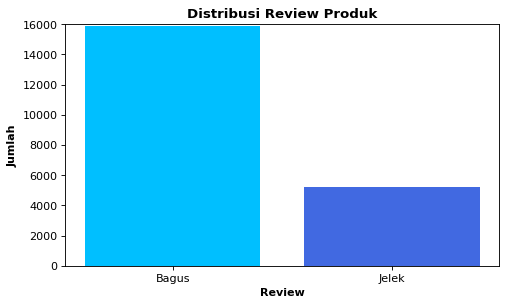

In [11]:
height = data['label'].value_counts()
labels = ('Bagus','Jelek')
y_pos = np.arange(len(labels))

plt.figure(figsize=(7,4), dpi=80)
plt.ylim(0,16000)
plt.title('Distribusi Review Produk', fontweight='bold')
plt.xlabel('Review', fontweight='bold')
plt.ylabel('Jumlah', fontweight='bold')
plt.bar(y_pos, height, color=['deepskyblue', 'royalblue'])
plt.xticks(y_pos, labels)
plt.show()

# Text Preprocessing

## Case Folding

In [12]:
import re

# Buat fungsi untuk langkah case folding
def casefolding(text):
  text = text.lower()                               # Mengubah teks menjadi lower case
  text = re.sub(r'https?://\S+|www\.\S+', '', text) # Menghapus URL
  text = re.sub(r'[-+]?[0-9]+', '', text)           # Menghapus angka
  text = re.sub(r'[^\w\s]',' ', text)                # Menghapus karakter tanda baca
  text = text.strip()
  return text

In [13]:
raw_sample = data['reviewContent'].iloc[7]
case_folding = casefolding(raw_sample)

print('Raw data\t: ', raw_sample)
print('Case folding\t: ', case_folding)

Raw data	:  Bagaimana tv LED saya merek Sharp 24 hitam LC 24LE170i sekarang mati total baru 2 bln kemana saya harus menghubungi dan meminta bantuan mohon kebijakan dan solusinya ,, so,alnya masih garansi kepada pihak lazada saya mohon bantuannya terimakasih!!!
Case folding	:  bagaimana tv led saya merek sharp  hitam lc lei sekarang mati total baru  bln kemana saya harus menghubungi dan meminta bantuan mohon kebijakan dan solusinya    so alnya masih garansi kepada pihak lazada saya mohon bantuannya terimakasih


## Word normalization

In [14]:
key_norm = pd.read_csv('file/key_norm.csv')

def text_normalize(text):
  text = ' '.join([key_norm[key_norm['singkat'] == word]['hasil'].values[0] if (key_norm['singkat'] == word).any() else word for word in text.split()])
  text = str.lower(text)
  return text

## Filtering (Stopword Removal)

In [15]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords

stopwords_ind = stopwords.words('indonesian')

In [16]:
# Buat fungsi untuk langkah stopword removal

def remove_stop_words(text):
  clean_words = []
  text = text.split()
  for word in text:
      if word not in stopwords_ind:
          clean_words.append(word)
  return " ".join(clean_words)

In [17]:
raw_sample = data['reviewContent'].iloc[7]
case_folding = casefolding(raw_sample)
stopword_removal = remove_stop_words(case_folding)

print('Raw data\t\t: ', raw_sample)
print('Case folding\t\t: ', case_folding)
print('Stopword removal\t: ', stopword_removal)

Raw data		:  Bagaimana tv LED saya merek Sharp 24 hitam LC 24LE170i sekarang mati total baru 2 bln kemana saya harus menghubungi dan meminta bantuan mohon kebijakan dan solusinya ,, so,alnya masih garansi kepada pihak lazada saya mohon bantuannya terimakasih!!!
Case folding		:  bagaimana tv led saya merek sharp  hitam lc lei sekarang mati total baru  bln kemana saya harus menghubungi dan meminta bantuan mohon kebijakan dan solusinya    so alnya masih garansi kepada pihak lazada saya mohon bantuannya terimakasih
Stopword removal	:  tv led merek sharp hitam lc lei mati total bln kemana menghubungi bantuan mohon kebijakan solusinya so alnya garansi lazada mohon bantuannya terimakasih


## Stemming

In [18]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Buat fungsi untuk langkah stemming bahasa Indonesia
def stemming(text):
  text = stemmer.stem(text)
  return text

In [19]:
raw_sample = data['reviewContent'].iloc[7]
case_folding = casefolding(raw_sample)
stopword_removal = remove_stop_words(case_folding)
text_stemming = stemming(stopword_removal)

print('Raw data\t\t: ', raw_sample)
print('Case folding\t\t: ', case_folding)
print('Stopword removal\t: ', stopword_removal)
print('Stemming\t\t: ', text_stemming)

Raw data		:  Bagaimana tv LED saya merek Sharp 24 hitam LC 24LE170i sekarang mati total baru 2 bln kemana saya harus menghubungi dan meminta bantuan mohon kebijakan dan solusinya ,, so,alnya masih garansi kepada pihak lazada saya mohon bantuannya terimakasih!!!
Case folding		:  bagaimana tv led saya merek sharp  hitam lc lei sekarang mati total baru  bln kemana saya harus menghubungi dan meminta bantuan mohon kebijakan dan solusinya    so alnya masih garansi kepada pihak lazada saya mohon bantuannya terimakasih
Stopword removal	:  tv led merek sharp hitam lc lei mati total bln kemana menghubungi bantuan mohon kebijakan solusinya so alnya garansi lazada mohon bantuannya terimakasih
Stemming		:  tv led merek sharp hitam lc lei mati total bln mana hubung bantu mohon bijak solusi so alnya garansi lazada mohon bantu terimakasih


## Text Preprocessing Pipeline

In [20]:
# Buat fungsi untuk menggabungkan seluruh langkah text preprocessing
def text_preprocessing_process(text):
  text = casefolding(text)
  text = text_normalize(text)
  text = remove_stop_words(text)
  text = stemming(text)
  return text

## Hasil text Preprocessing

In [8]:
data = pd.read_csv('file/clean_data.csv')

In [9]:
data

,Unnamed: 0,reviewTitle,reviewContent,rating,label,clean_teks
0,2,ok mantaaapppp barang sesuai pesanan.. good,okkkkk mantaaaaaaapppp ... goood,5,1,okkkkk mantaaaaaaapppp goood
1,7,ada pengirimn ntb bima,bima,1,0,bima
2,9,Barang bagus sesuai specs,"Pesan rabu sore,minggu sore sampe,,barang sesu...",5,1,pesan rabu sore minggu sore barang sesuai spec...
3,11,Ini cicil pake apa?,"Mau tanya ini cicilnya pake apa ya,cc bkn?",1,0,cicil pakai ya cc
4,12,Beli cash sesuai Harga di atas,Apakah TV. Tsb. Suda ada anti gores..,5,1,televisi suda anti gores
...,...,...,...,...,...,...
21073,203780,Orderan,Wkwkwk,5,1,wkwkwk
21074,203781,Wrong Picture in the Article - I got the wrong...,seller incapable to keep his product page clea...,1,0,jual incapable keep his produk page clear the ...
21075,203782,murah,barang bagus dengan harga kompetitif,5,1,barang bagus harga kompetitif
21076,203785,AKARI LED TV,Ok.thank lazada Pagi order sore barang nyampe ...,3,0,ok thank lazada pagi order sore barang packing...


# Feature Engineering

In [10]:
data = pd.read_csv('file/clean_data.csv')
data.dropna()
# Pisahkan kolom feature dan target
X, y = data.clean_teks.fillna(' '), data.label

In [11]:
X

0                             okkkkk mantaaaaaaapppp goood
1                                                     bima
2        pesan rabu sore minggu sore barang sesuai spec...
3                                        cicil pakai ya cc
4                                 televisi suda anti gores
                               ...                        
21073                                               wkwkwk
21074    jual incapable keep his produk page clear the ...
21075                        barang bagus harga kompetitif
21076    ok thank lazada pagi order sore barang packing...
21077    fitur fungsi harga murah cinta produk indonesi...
Name: clean_teks, Length: 21078, dtype: object

In [12]:
y

0        1
1        0
2        1
3        0
4        1
        ..
21073    1
21074    0
21075    1
21076    0
21077    1
Name: label, Length: 21078, dtype: int64

## Feature Extraction (Bag of Words & N-Gram)
Proses mengubah teks menjadi vektor menggunakan metode BoW

In [13]:
from sklearn.feature_extraction.text import CountVectorizer

# BoW - Unigram
bow = CountVectorizer(ngram_range=(1,1))
bow.fit(X)

CountVectorizer()

In [14]:
# Melihat Jumlah Fitur
print(len(bow.get_feature_names_out()))

6729


In [15]:
# Melihat fitur-fitur apa saja yang ada di dalam corpus
print(bow.get_feature_names_out())

['aaa' 'aada' 'aamiin' ... 'zonk' 'zs' 'zuma']


In [16]:
# Melihat matriks jumlah token
# Data ini siap untuk dimasukkan dalam proses pemodelan (machine learning)

X_bow = bow.transform(X).toarray()
X_bow

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [17]:
data_bow = pd.DataFrame(X_bow, columns=bow.get_feature_names_out())
data_bow

,aaa,aada,aamiin,ababila,abai,abal,abalan,abang,abc,abid,...,yure,yuv,yya,zen,zenfone,zipper,zippernya,zonk,zs,zuma
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21073,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21074,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21075,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21076,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
with open('bow_feature.pickle', 'wb') as output:
  pickle.dump(X_bow, output)

## Feature Extraction (TF-IDF & N-Gram)
Proses mengubah teks menjadi vector menggunakan metode TF-IDF

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf_idf = TfidfVectorizer(ngram_range=(1,1))
tf_idf.fit(X)

TfidfVectorizer()

In [20]:
# Melihat Jumlah Fitur
print(len(tf_idf.get_feature_names_out()))

6729


In [21]:
# Melihat fitur-fitur apa saja yang ada di dalam corpus
print(tf_idf.get_feature_names_out())

['aaa' 'aada' 'aamiin' ... 'zonk' 'zs' 'zuma']


In [22]:
# Melihat matriks jumlah token
# Data ini siap untuk dimasukkan dalam proses pemodelan (machine learning)

X_tf_idf = tf_idf.transform(X).toarray()
X_tf_idf

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [23]:
# Melihat matriks jumlah token menggunakan TF IDF, lihat perbedaannya dengan metode BoW
# Data ini siap untuk dimasukkan dalam proses pemodelan (machine learning)

data_tf_idf = pd.DataFrame(X_tf_idf, columns=tf_idf.get_feature_names_out())
data_tf_idf

,aaa,aada,aamiin,ababila,abai,abal,abalan,abang,abc,abid,...,yure,yuv,yya,zen,zenfone,zipper,zippernya,zonk,zs,zuma
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21073,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21074,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21075,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21076,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
with open('tf_idf_feature.pickle', 'wb') as output:
  pickle.dump(X_tf_idf, output)

## Feature Selection

In [25]:
# Mengubah nilai data tabular tf-idf menjadi array agar dapat dijalankan pada proses seleksi fitur
X = np.array(data_tf_idf)
y = np.array(y)

In [26]:
from sklearn.feature_selection import SelectKBest 
from sklearn.feature_selection import chi2 

# Ten features with highest chi-squared statistics are selected 
chi2_features = SelectKBest(chi2, k=1000) 
X_kbest_features = chi2_features.fit_transform(X, y) 
  
# Reduced features 
print('Original feature number:', X.shape[1]) 
print('Reduced feature number:', X_kbest_features.shape[1]) 

Original feature number: 6729
Reduced feature number: 1000


In [27]:
X_kbest_features

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [28]:
# chi2_features.scores_ adalah nilai chi-square, semakin tinggi nilainya maka semakin baik fiturnya
data_chi2 = pd.DataFrame(chi2_features.scores_, columns=['nilai'])
data_chi2

,nilai
0,0.268927
1,1.843359
2,1.408167
3,0.159341
4,0.297576
...,...
6724,0.168985
6725,1.978393
6726,0.491682
6727,0.099695


In [29]:
# Menampilkan fitur beserta nilainya
feature = tf_idf.get_feature_names_out()
data_chi2['fitur'] = feature
data_chi2

,nilai,fitur
0,0.268927,aaa
1,1.843359,aada
2,1.408167,aamiin
3,0.159341,ababila
4,0.297576,abai
...,...,...
6724,0.168985,zipper
6725,1.978393,zippernya
6726,0.491682,zonk
6727,0.099695,zs


In [30]:
# Mengurutkan fitur terbaik
data_chi2.sort_values(by='nilai', ascending=False)

,nilai,fitur
2871,1.942208e+02,kecewa
1026,1.675640e+02,cepat
383,1.592251e+02,bagus
6229,1.322214e+02,tolong
3618,1.133208e+02,mantap
...,...,...
1605,3.483694e-05,dpakai
1079,2.162547e-05,cina
636,1.390192e-05,bgs
3774,2.742197e-07,meter


In [31]:
# Menampilkan mask pada feature yang diseleksi
# False berarti fitur tidak terpilih dan True berarti fitur terpilih
mask = chi2_features.get_support()
mask

array([False, False, False, ..., False, False, False])

In [32]:
# Menampilkan fitur-fitur terpilih berdasarkan mask atau nilai tertinggi yang sudah dikalkulasi pada Chi-Square
new_feature = []

for bool, f in zip(mask, feature):
  if bool:
    new_feature.append(f)
  selected_feature = new_feature



In [33]:
tf_idf.vocabulary_

{'okkkkk': 4296,
 'mantaaaaaaapppp': 3597,
 'goood': 2153,
 'bima': 668,
 'pesan': 4650,
 'rabu': 4952,
 'sore': 5712,
 'minggu': 3811,
 'barang': 464,
 'sesuai': 5512,
 'specs': 5737,
 'mantap': 3618,
 'terimakasih': 6066,
 'lazada': 3325,
 'cicil': 1069,
 'pakai': 4434,
 'ya': 6676,
 'cc': 996,
 'televisi': 6010,
 'suda': 5828,
 'anti': 223,
 'gores': 2158,
 'kirim': 3013,
 'janji': 2595,
 'express': 1827,
 'jumat': 2702,
 'moga': 3860,
 'awet': 335,
 'kualitas': 3171,
 'ok': 4278,
 'led': 3355,
 'merek': 3759,
 'sharp': 5536,
 'hitam': 2369,
 'lc': 3345,
 'lei': 3363,
 'mati': 3669,
 'total': 6249,
 'mana': 3580,
 'hubung': 2403,
 'bantu': 452,
 'mohon': 3862,
 'bijak': 659,
 'solusi': 5704,
 'alnya': 158,
 'garansi': 2033,
 'tahan': 5922,
 'cra': 1182,
 'nya': 4204,
 'bagus': 383,
 'cepat': 1026,
 'sipplahhh': 5613,
 'packaging': 4398,
 'good': 2145,
 'oke': 4281,
 'thnks': 6146,
 'jual': 2687,
 'terima': 6062,
 'selamat': 5421,
 'produk': 4830,
 'deskripsi': 1349,
 'nyape': 4227,


In [34]:
# Lihat vocab yang dihasilkan oleh TF_IDF
# tf_idf.vocabulary_ 

kbest_feature = {} # Buat dictionary kosong

for (k,v) in tf_idf.vocabulary_.items():    # Iterasi untuk mengulangi vocab yang dihasilkan TF_IDF
  if k in selected_feature:                 # Cek apakah fitur termasuk k fitur yang diseleksi
    kbest_feature[k] = v          

In [35]:
kbest_feature

{'bima': 668,
 'sore': 5712,
 'minggu': 3811,
 'barang': 464,
 'sesuai': 5512,
 'mantap': 3618,
 'terimakasih': 6066,
 'lazada': 3325,
 'cicil': 1069,
 'pakai': 4434,
 'ya': 6676,
 'cc': 996,
 'kirim': 3013,
 'moga': 3860,
 'awet': 335,
 'kualitas': 3171,
 'ok': 4278,
 'led': 3355,
 'hitam': 2369,
 'lei': 3363,
 'mati': 3669,
 'mana': 3580,
 'hubung': 2403,
 'mohon': 3862,
 'bijak': 659,
 'solusi': 5704,
 'garansi': 2033,
 'nya': 4204,
 'bagus': 383,
 'cepat': 1026,
 'packaging': 4398,
 'good': 2145,
 'oke': 4281,
 'jual': 2687,
 'terima': 6062,
 'selamat': 5421,
 'produk': 4830,
 'deskripsi': 1349,
 'senang': 5468,
 'ekspektasi': 1717,
 'senin': 5477,
 'malam': 3564,
 'pokok': 4750,
 'top': 6242,
 'deh': 1294,
 'tolak': 6227,
 'harga': 2276,
 'gambar': 2006,
 'poko': 4748,
 'beli': 550,
 'minat': 3804,
 'informasi': 2490,
 'takut': 5933,
 'kasih': 2822,
 'mulusss': 3924,
 'mantapppppp': 3625,
 'jangkau': 2592,
 'emang': 1745,
 'intel': 2524,
 'core': 1158,
 'salah': 5244,
 'judul': 26

In [36]:
X_kbest_features

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [49]:
# Menampilkan fitur-fitur yang sudah diseleksi 
# Beserta nilai vektornya pada keseluruhan data untuk dijalankan pada proses machine learning

# Hanya k fitur yang terpilih sesuai parameter k yang ditentukan sebelumnya

data_selected_feature = pd.DataFrame(X_kbest_features, columns=selected_feature)
data_selected_feature

,abidin,add,aduh,agian,agst,agustus,ahmad,akses,aktifin,akur,...,xcel,xx,xxx,ya,yah,yak,yaw,ygcabang,yulia,zenfone
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.333683,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21073,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
21074,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
21075,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
21076,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [58]:
with open('kbest_feature.pickle', 'wb') as output:
  pickle.dump(kbest_feature, output)

# Modeling (Machine Learning)

In [74]:
data_feature = data_selected_feature
data_feature['label'] = y
data_feature.to_csv('file/data_feature.csv')

In [75]:
from sklearn.model_selection import train_test_split
# Proses memisahkan data uji dan data latih. Perbandingan 80:20
# Random_state digunakan untuk internal random generator
x = data_feature.drop(columns='label')
y = data_feature.label
X_train, X_test, y_train, y_test = train_test_split(x.values, y.values, test_size=0.2, random_state=40)

## Naive Bayes

In [71]:
from joblib import dump
from sklearn.naive_bayes import MultinomialNB           # Pilih salah satu algoritma pembelajaran

# Training the model
algorithm = MultinomialNB()               # Load algoritma pembelajaran tertentu
model = algorithm.fit(X_train, y_train)   # Fitkan (latih) algoritman menggunakan data latih & label latih 

# Simpan model hasil traning
dump(model, filename='model_1.joblib')

['model_1.joblib']

## KNN

In [52]:
from sklearn.neighbors import KNeighborsClassifier as KNC

knn = KNC(n_neighbors=1)
model_knn = knn.fit(X_train,y_train)

dump(model_knn, filename='model_2.joblib')

['model_2.joblib']

## Hasil Prediksi

In [53]:
def predictResult(model):
  ### Hasil menggunakan Naive Bayes
  # Gunakan model yang telah di latih untuk prediksi pada data uji
  model_pred = model.predict(X_test)

  # Tampilkan hasil prediksi model
  model_pred
  # Label sebenarnya (actual label)
  y_test
  # Hitung berapa jumlah data yang berhasil di prediksi model & jumlah data yang salah
  prediksi_benar = (model_pred == y_test).sum()
  prediksi_salah = (model_pred != y_test).sum()
  print("========================")
  print('Jumlah prediksi benar\t:', prediksi_benar)
  print('Jumlah prediksi salah\t:', prediksi_salah)

  accuracy = prediksi_benar / (prediksi_benar + prediksi_salah)*100
  print('Accuracy pengujian\t:', accuracy, '%')
  from sklearn.metrics import confusion_matrix
  print("========================")
  cm = confusion_matrix(y_test, model_pred)
  print('Confusion matrix:\n', cm)
  from sklearn.metrics import classification_report
  print("========================")
  print('Classification report:\n', classification_report(y_test, model_pred))
  # Cross Validation
  print("========================")
  from sklearn.model_selection import ShuffleSplit    # bisa pilih beberapa teknik cross validation
  from sklearn.model_selection import cross_val_score # untuk mengetahui performa model pada cross validation

  cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=50)

  cv_accuracy = (cross_val_score(model, X_kbest_features, y, cv=cv, scoring='accuracy'))
  avg_accuracy = np.mean(cv_accuracy)

  print('Accuracy setiap split:', cv_accuracy, '\n')
  print('Rata-rata Accuracy cross validation:', avg_accuracy)

In [72]:
print("Hasil Naive Bayes")
predictResult(model)

Hasil Naive Bayes
Jumlah prediksi benar	: 3687
Jumlah prediksi salah	: 529
Accuracy pengujian	: 87.45256166982922 %
Confusion matrix:
 [[ 529  468]
 [  61 3158]]
Classification report:
               precision    recall  f1-score   support

           0       0.90      0.53      0.67       997
           1       0.87      0.98      0.92      3219

    accuracy                           0.87      4216
   macro avg       0.88      0.76      0.79      4216
weighted avg       0.88      0.87      0.86      4216

Accuracy setiap split: [0.86527514 0.87025617 0.86124288 0.8607685  0.86574953 0.86385199
 0.86480076 0.86574953 0.87950664 0.86432638] 

Rata-rata Accuracy cross validation: 0.86615275142315


In [55]:
print("Hasil KNN")
predictResult(model_knn)

Hasil KNN
Jumlah prediksi benar	: 3993
Jumlah prediksi salah	: 223
Accuracy pengujian	: 94.71062618595826 %
Confusion matrix:
 [[ 852  145]
 [  78 3141]]
Classification report:
               precision    recall  f1-score   support

           0       0.92      0.85      0.88       997
           1       0.96      0.98      0.97      3219

    accuracy                           0.95      4216
   macro avg       0.94      0.92      0.92      4216
weighted avg       0.95      0.95      0.95      4216

Accuracy setiap split: [0.94473435 0.92647059 0.94497154 0.91888046 0.93785579 0.94093928
 0.94283681 0.94402277 0.94710626 0.94686907] 

Rata-rata Accuracy cross validation: 0.9394686907020873


In [76]:
from sklearn import metrics
Ks = 11
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
confussionMx = [];

for n in range(1, Ks):
  neighbor = KNC(n_neighbors = n).fit(X_train,y_train)
  yhat = neighbor.predict(X_test)
  mean_acc[n-1] = metrics.accuracy_score(y_test,yhat)
  std_acc[n-1] = np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.94710626, 0.91911765, 0.903463  , 0.89112903, 0.87926945,
       0.87523719, 0.83704934, 0.83942125, 0.82234345, 0.82779886])

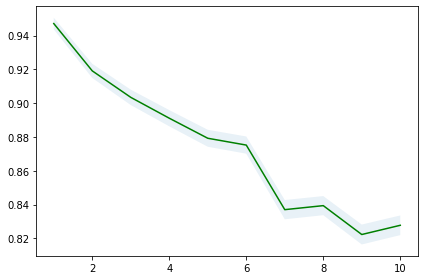

In [57]:
plt.plot(range(1, Ks), mean_acc, 'g')
plt.fill_between(range(1,Ks),mean_acc-1*std_acc, mean_acc+1*std_acc, alpha =  0.10)
plt.tight_layout()
plt.show()

# Deployment

In [47]:
from joblib import load
import pickle

# load model
model = load('model_2.joblib')

# load vocabulary dari TF_idf
vocab = pickle.load(open('kbest_feature.pickle', 'rb'))

In [48]:
#@title Masukkan Teks Anda:
input_text = "barang rusak " #@param {type:"string"}

pre_input_text = text_preprocessing_process(input_text)   # lakukan text pre processing pada text input

tf_idf_vec = TfidfVectorizer(vocabulary=set(vocab))       # definisikan TF_IDF

result = model.predict(tf_idf_vec.fit_transform([pre_input_text]))  # Lakukan prediksi
print('Input Text :', input_text)
print('Hasil Text Preprocessing :', pre_input_text)

if (result==0):
  review = 'Review Jelek'
elif (result==1):
  review = 'Review Bagus'


print('Hasil prediksi:', review)

NameError: name 'text_preprocessing_process' is not defined

# Resume
- Dataset : review product 
- Link    : https://drive.google.com/file/d/1qn5WXp-H95_FL_Rx5oqvfZaflYdHsnrF/view?usp=sharing

### Tahap Akuisisi Data :
membuat dataframe baru dengan menyeleksi kolom reviewTitle, reviewContent, dan rating. Selanjutnya menghapus data NaN, Kemudian saya mempersempit target label menjadi 2, yaitu Review Jelek dan Review Bagus berdasarkan jumlah rating. Rating 1-3 dikelompokan menjadi Review jelek dan rating 4 & 5 dikelompokan menjadi Review Bagus. Dari data tersebut menghasilkan Review Jelek sebesar 5190 data, dan Review Bagus sebesar 15888 data.

### Tahap Preprocessing data :
- Melakukan case folding menggunakan library re yang mencakup beberapa tahap, yaitu mengubah teks menjadi lowercase, menghapus URL, menghapus angka, dan menghappus tanda baca.

- Melakukan word normalization berdasarkan key_norm pada data file key_norm.csv, untuk menormalkan kata singkatan.

- Melakukan proses filtering stopword removal menggunakan data dari library nltk, untuk menghapus kata penghubung(konjungsi) bahasa Indonesia.

- Melakukan Stemming untuk menghapus kata imbuhan bahasa Indonesia menggunakan library sastrawi.

- Setelah tahap preprocessing data selesai dilakukan, data yang sudah diproses kemudian disimpan sebagai file csv.

### Tahap Feature Engineering :

- Melakukan ekstraksi fitur menggunakan Bag of Words dan N-Gram, untuk mengubah teks menjadi vektor, kemudian menyimpan hasil ekstraksi menggunakan pickle.

- Melakukan ekstraksi fitur menggunakan TF-IDF dan N-Gram, untuk mengubah teks menjadi vektor, kemudian menyimpan hasil ekstraksi menggunakan pickle.

- Melakukan feature selection dari data ekstraksi TF-IDF, untuk memetakan nilai chi-square, dimana semakin tinggi  nilainya maka fiturnya akan semakin baik.

